# Google Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
과일채소목록 = pd.read_csv(io.BytesIO(myfile['과일채소목록.csv']),
                       encoding='cp949')
과일채소목록

Saving 과일채소목록.csv to 과일채소목록.csv


,종류,무게_g,길이_cm,색상,당도
0,수박,2000,30.0,1,8.0
1,수박,2500,25.0,1,7.0
2,수박,1800,20.0,1,6.5
3,수박,1500,16.0,1,8.5
4,수박,2200,21.0,1,9.5
5,자두,100,3.5,3,6.0
6,자두,120,3.7,3,7.0
7,자두,90,2.8,3,8.0
8,자두,150,3.8,3,8.5
9,자두,110,3.6,3,7.5


# 로컬 데이터 로드

In [ ]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../머신러닝실습용자료/과일채소목록.csv',encoding='cp949')
src_data

FileNotFoundError: [Errno 2] No such file or directory: '../머신러닝실습용자료/과일채소목록.csv'

# 공통 실습 코드

In [ ]:
#Step 3. 훈련용 세트와 테스트용 세트로 나눕니다.
from sklearn.model_selection import train_test_split

src_data = 과일채소목록
# '무게_g','길이_cm','색상','당도'에 따른 과일종류 분류
data = src_data[['무게_g','길이_cm','색상','당도']]
target = src_data['종류']

# train, test 데이터 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(
    data, target, test_size=0.25, random_state=40)

In [ ]:
# 각각의 데이터 확인
print(훈련용_data.shape , 테스트용_data.shape)
print(훈련용_data)
print(훈련용_target)

(37, 4) (13, 4)
    무게_g  길이_cm  색상   당도
21   250   25.0   3  7.5
44   351   20.1   1  1.4
41   501   25.1   1  2.1
23   270   26.0   3  8.5
36   401    7.6   2  7.3
5    100    3.5   3  6.0
13   400    6.5   2  6.5
39   601    8.6   2  8.1
17   380   22.0   1  1.5
43   401   23.1   1  1.1
24   290   29.0   3  9.0
3   1500   16.0   1  8.5
22   220   22.0   3  7.0
40   451   20.1   1  3.1
26  2501   25.1   1  7.1
34   111    3.7   3  7.6
20   280   28.0   3  8.0
28  1501   16.1   1  8.6
14   600    8.5   2  8.0
15   450   20.0   1  3.0
30   101    3.6   3  6.1
8    150    3.8   3  8.5
46   251   25.1   3  7.6
32    91    2.9   3  8.1
9    110    3.6   3  7.5
48   271   26.1   3  8.6
42   381   22.1   1  1.6
10   500    8.0   2  8.0
31   121    3.8   3  7.1
19   350   20.0   1  1.3
47   221   22.1   3  7.1
12   450    8.0   2  7.5
1   2500   25.0   1  7.0
37   451    8.1   2  7.6
7     90    2.8   3  8.0
27  1801   20.1   1  6.6
6    120    3.7   3  7.0
21    거봉포도
44     옥수수
41     옥수수
2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier()
# 학습
rf.fit(훈련용_data, 훈련용_target)
# 예측
rf.predict([[1500,15,0,10]])
# score
rf.score(테스트용_data,테스트용_target)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1.0

### 결과표 작성 및 시각화

In [ ]:
# 테스트 데이터 확인
print(테스트용_data.shape , 테스트용_data.shape)
print(테스트용_data)
print(테스트용_target)

(13, 4) (13, 4)
    무게_g  길이_cm  색상   당도
33   151    3.9   3  8.6
29  2201   21.1   1  9.6
49   291   29.1   3  9.1
38   401    6.6   2  6.6
45   281   28.1   3  8.1
0   2000   30.0   1  8.0
18   400   23.0   1  1.0
4   2200   21.0   1  9.5
11   400    7.5   2  7.2
2   1800   20.0   1  6.5
16   500   25.0   1  2.0
35   501    8.1   2  8.1
25  2001   30.5   1  8.1
33      자두
29      수박
49    거봉포도
38      참외
45    거봉포도
0       수박
18     옥수수
4       수박
11      참외
2       수박
16     옥수수
35      참외
25      수박
Name: 종류, dtype: object


In [ ]:
# 예측결과 데이터프레임을 만들고
예측결과 = pd.DataFrame(rf.predict(테스트용_data), columns=['예측결과'])
# concat을 통해 기존 테스트 data와 예측결과 데이터를 합친다.
result = pd.concat([테스트용_data.reset_index(drop=True), 예측결과], axis=1)
result

,무게_g,길이_cm,색상,당도,예측결과
0,151,3.9,3,8.6,자두
1,2201,21.1,1,9.6,수박
2,291,29.1,3,9.1,거봉포도
3,401,6.6,2,6.6,참외
4,281,28.1,3,8.1,거봉포도
5,2000,30.0,1,8.0,수박
6,400,23.0,1,1.0,옥수수
7,2200,21.0,1,9.5,수박
8,400,7.5,2,7.2,참외
9,1800,20.0,1,6.5,수박


In [ ]:
# k-fold 교차 검증
import numpy as np
from sklearn.model_selection import cross_validate

# rf = randomforest모델
# return_train_score = True -> 학습시, score점수를 누적해서 반환
# n_jobs : 동시에 실행되는 갯수 : -1 자동 지정

scores = cross_validate(rf, 훈련용_data, 훈련용_target,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

중요속성지표값: [0.35188581 0.28679953 0.20081789 0.16049677]


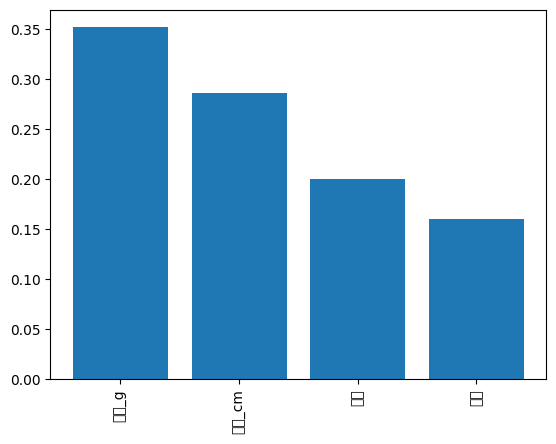

In [ ]:
# 중요 속성 지표값 출력

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

imp = rf.feature_importances_
print('중요속성지표값:',imp)

plt.figure()
plt.bar(range(len(imp)),imp)
plt.xticks(range(len(imp)),data.columns, rotation=90)
plt.show()